In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the data
df = pd.read_csv("./data/heart.csv")

In [3]:
#view first 5 row
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#shape of data
df.shape

(303, 14)

In [25]:
#columns
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
#description of data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


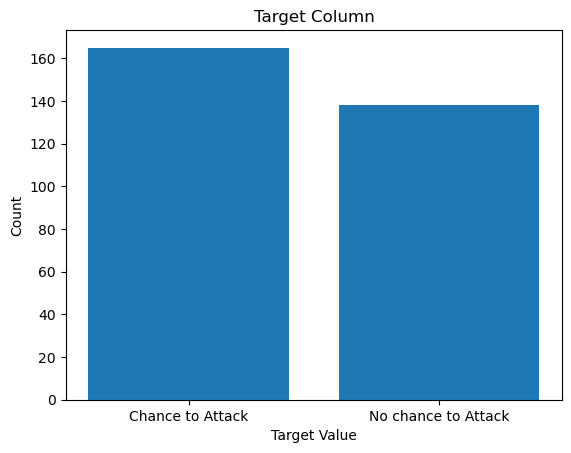

In [8]:
#get the target and convert into list
target = df['output'].to_list()
#count the len of data of target
counts = [target.count(1), target.count(0)]
# Define the labels for the plot
labels = ['Chance to Attack', 'No chance to Attack']
# Create a bar plot
plt.bar(labels, counts)
# Add labels and title
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Target Column')

# Display the plot
plt.show()

In [22]:
desired_age = 54
# Filter the dataset based on the desired age
filtered_data = df[df['age'] == desired_age]
# Calculate the count of deaths for the desired age
death_count = filtered_data['output'].sum()
# Print the count of deaths for the desired age
print(f"Count of deaths for age {desired_age}: {death_count}")

Count of deaths for age 54: 10


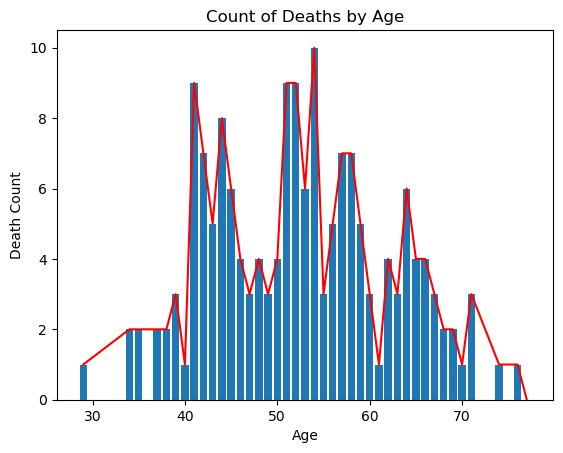

In [21]:
# Group the data by age and calculate the count of deaths for each age
age_death_count = df.groupby('age')['output'].sum().reset_index()
# Plot the count of deaths against the age values
plt.bar(age_death_count['age'], age_death_count['output'])
plt.plot(age_death_count['age'], age_death_count['output'], color='red')
plt.xlabel('Age')
plt.ylabel('Death Count')
plt.title('Count of Deaths by Age')
plt.show()

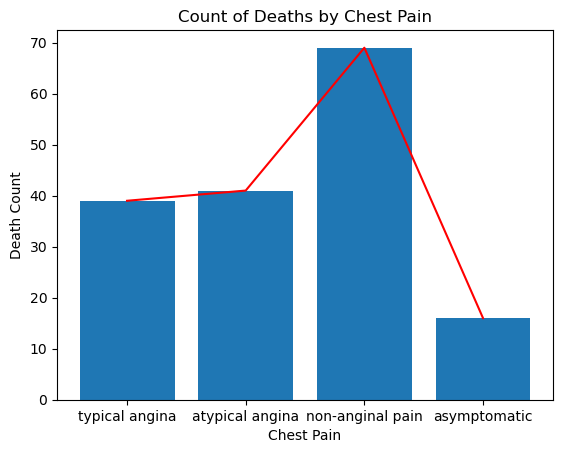

In [45]:
categories = ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
# Group the data by Chest Pain and calculate the count of deaths for each CP
age_death_count = df.groupby('cp')['output'].sum().reset_index()
values = age_death_count['output'].to_list()
# Plot the count of deaths against the CP values
plt.bar(categories, age_death_count['output'])
plt.plot(age_death_count['cp'], age_death_count['output'], color='red')
plt.xlabel('Chest Pain')
plt.ylabel('Death Count')
plt.title('Count of Deaths by Chest Pain')
plt.show()